# 06_Flood_Depth_Prediction: Trucks

Please see the model notebook and resources documentation for attribution on the model.

This notebook does NOT train a new model; it will build an identical model and load the weights, then use the model for predictions only. 

Ways to use this notebook:
 1. Run the notebook AS-IS    
 If you run the notebook as is, it will rebuild the model (< 1 minute) and run the predictions on the pre-configured test folder.
 1. Modify the test folder
 If you modify the global parameter to point to another image folder, the model will perform predictions on the images in that folder.

## Contents:    
 - 

## Import

In [1]:
import keras,os
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPool2D , Flatten
from keras.preprocessing.image import ImageDataGenerator
from keras.models import load_model
#from keras.callbacks import ModelCheckpoint, EarlyStopping
#from keras.optimizers import Adam
from keras.preprocessing import image

import numpy as np
import matplotlib.pyplot as plt


Using TensorFlow backend.


In [2]:
keras.__version__ # expecting 2.3.1 or possibly higher

'2.3.1'

## User configurable settings

#TODO: Make a picture to go here

For predictions on your custom images, please set up your directory as shown:
    image_test_dir     
    |- category_name     
    |      - image_name.jpg     
    |      - ... as many images as you like     
    |     
    |- category_name_2     
    |      - image_name.jpg     
    |      - ... as many images as you like     

In [3]:
# Change this path if you would like to receive predictions on images from another folder

image_test_dir = '../images/truck/test'
image_test_dir = '../images/user_images'
# The example user_images contains 2 categories: unknown_Cristobol and unknown_other




-----------   DO NOT MODIFY BEYOND THiS POINT ---------  

Please run the notebook and then scroll to the bottom to see image predictions.

## Utility functions

In [4]:
# Model weights to load
model_weights = './vgg16w_truck_3_v1.h5'

# Category predictions
prediction_labels = ['depth_0','depth_1','depth_2','depth_3','depth_4']
num_categories = 5

In [5]:
# Remove .DS_store from the list of files in a directory
def rm_DS(mlist): 
    if ('.DS_Store' in mlist): mlist.remove('.DS_Store')
    return mlist

# (Re-) Build the model

Model building and training were described in an earlier notebook. 

CAUTION: Do not make changes to this model. It must exactly match the training model in order to re-use the model weights.

In [6]:
model = Sequential()
model.add(Conv2D(input_shape=(224,224,3),filters=64,kernel_size=(3,3),padding="same", 
                 activation="relu"))
model.add(Conv2D(filters=64,kernel_size=(3,3),padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))

model.add(Flatten())
model.add(Dense(units=4096,activation="relu"))
model.add(Dense(units=4096,activation="relu"))
model.add(Dense(units=num_categories, activation="softmax")) # needs to be the same as the num classes

In [7]:
model.load_weights(model_weights)

## Utilities for predictions

In [8]:
# Show the images with the Actual and Predicted classifications
def evaluate_test_images(cat,image_test_dir,image_list):
    '''cat : name of image category
       img_list: list of images that should be in that category'''

    tot_images = len(image_list)
    tot_div_2 = (tot_images/2)+1
    
    # TODO: Start a dictionary of actual vs predicted so we can get a confusion
    #.    matrix

    fig = plt.figure(figsize=(14,4*tot_div_2)) # size for 2 columns

    img_num = 1
    ax_list = []
    fontsize = 20
    tot_images = len(image_list)

    for img_file in image_list:
        use_image = image_test_dir + '/' + img_file
        ax = fig.add_subplot(tot_div_2,2,img_num)

        img = image.load_img(use_image,target_size=(224,224))
        img = np.asarray(img)

        plt.imshow(img)

        img = np.expand_dims(img, axis=0)
        output = saved_model.predict(img)
        best_match = np.argmax(output)

        title_str = "Actual: " + cat + '\n' + "Predicted: " + prediction_labels[best_match]
        ax.set_title(title_str,fontsize=fontsize)
        ax_list.append(ax)
        img_num += 1

        plt.tight_layout()

# Predictions

To do predictions on the trained model, we will
- load the best saved model 
- pre-process the image to fit the model
- pass the image to the model to get the prediction
- display the model with the actual category and the predicted category

In [9]:
# Rename the model to avoid reworking the code (code must match previous notebook)
saved_model = model

In [10]:
if (image_test_dir == '../images/truck/test'):
    print(f"Checking the model on images in the test directory with catgories: \n\n{labels}")
else:
    labels = rm_DS(os.listdir(image_test_dir))

Category unknown_Cristobol has 1 test images.
Category unknown_other has 1 test images.


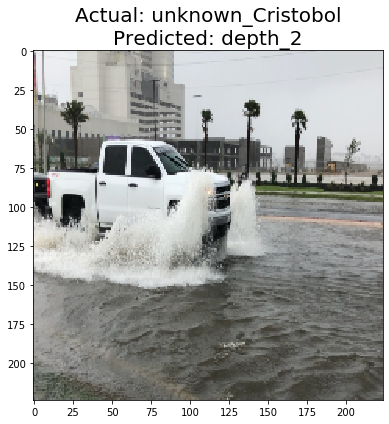

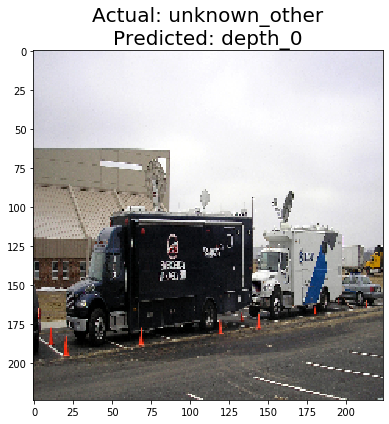

In [11]:
for caty in labels:
    category_dir = image_test_dir + '/' + caty
    img_list = rm_DS(os.listdir(category_dir))
    print(f"Category {caty} has {len(img_list)} test images.")
    evaluate_test_images(caty,category_dir,img_list)